<a href="https://colab.research.google.com/github/maxstclair/visualization/blob/main/EDA_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Visualization Assignment**

In [6]:
! git clone https://github.com/DS3001/visualization

Cloning into 'visualization'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 34 (delta 4), reused 1 (delta 1), pack-reused 23
Receiving objects: 100% (34/34), 7.18 MiB | 14.00 MiB/s, done.
Resolving deltas: 100% (7/7), done.


**Question 2**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Load the ./data/airbnb_NYC.csv data with Pandas. You should have cleaned the Price variable in question 2, and you'll need it later for this question.

In [ ]:
df = pd.read_csv('./visualization/assignment/data/airbnb_hw.csv')
price = df['Price']
price.unique()

array(['145', '37', '28', '199', '549', '149', '250', '90', '270', '290',
       '170', '59', '49', '68', '285', '75', '100', '150', '700', '125',
       '175', '40', '89', '95', '99', '499', '120', '79', '110', '180',
       '143', '230', '350', '135', '85', '60', '70', '55', '44', '200',
       '165', '115', '74', '84', '129', '50', '185', '80', '190', '140',
       '45', '65', '225', '600', '109', '1,990', '73', '240', '72', '105',
       '155', '160', '42', '132', '117', '295', '280', '159', '107', '69',
       '239', '220', '399', '130', '375', '585', '275', '139', '260',
       '35', '133', '300', '289', '179', '98', '195', '29', '27', '39',
       '249', '192', '142', '169', '1,000', '131', '138', '113', '122',
       '329', '101', '475', '238', '272', '308', '126', '235', '315',
       '248', '128', '56', '207', '450', '215', '210', '385', '445',
       '136', '247', '118', '77', '76', '92', '198', '205', '299', '222',
       '245', '104', '153', '349', '114', '320', '292', '22

In [ ]:
price = price.str.replace(',','') # Remove commas
price = pd.to_numeric(price,errors='coerce') # Convert to numeric
df['Price'] = price
del price

2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [ ]:
print(df.shape) # Dimensions
df.head()

(30478, 13)


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


The dimensions are: (30478, 13). The variables included are: Host Id,	Host Since,	Name,	Neighbourhood,	Property Type,	Review Scores Rating (bin),	Room Type,	Zipcode,	Beds,	Number of Records,	Number Of Reviews,	Price,	Review Scores Rating

3. Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [ ]:
pd.crosstab(df['Property Type'],df['Room Type']) # Cross tabulate

Room Type,Entire home/apt,Private room,Shared room
Property Type,,,
Apartment,15669,10748,685
Bed & Breakfast,13,155,12
Boat,7,1,0
Bungalow,4,0,0
Cabin,1,1,0
Camper/RV,6,1,0
Castle,0,1,0
Chalet,0,1,0
Condominium,72,22,0


The majority of the airbnb property types are listed as apartments, with relatively high numbers for houses and lofts as well. There are a variety of specialty types of rentals that make up a much smaller percentage, like castles or lighthouses (1 each). For apartments, it is more common to rent the entire unit, whereas houses and lofts have higher rates of single room rental. Shared rooms make up a small percentage of the overall dataset.

4. For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

<Axes: xlabel='Price', ylabel='Count'>

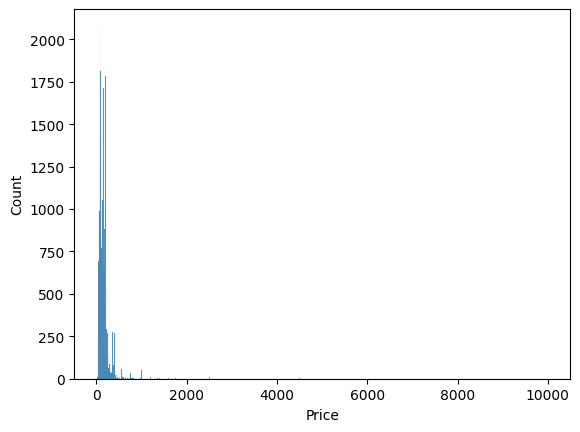

In [ ]:
sns.histplot(data=df,x='Price') # Histogram

<Axes: xlabel='Price', ylabel='Density'>

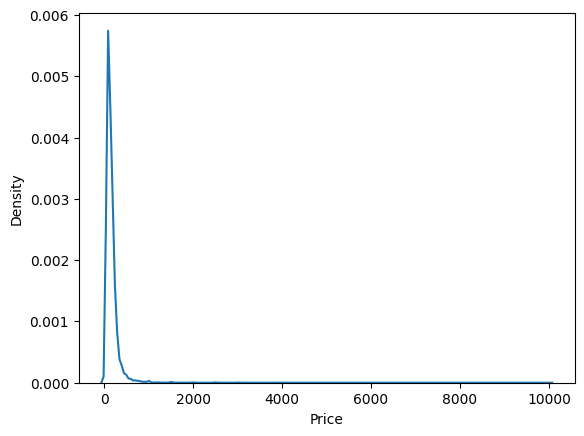

In [ ]:
sns.kdeplot(data=df,x='Price') # Kernel plot

<Axes: xlabel='Price'>

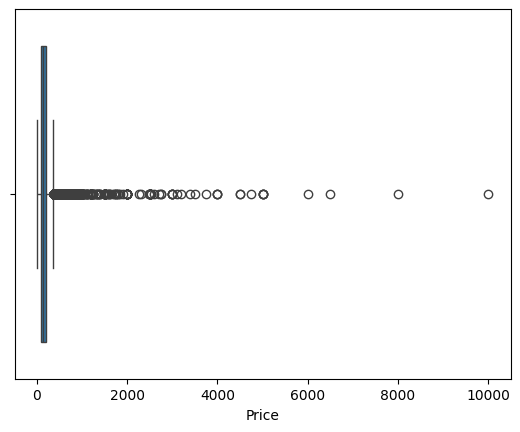

In [ ]:
sns.boxplot(data=df,x='Price') # Box plot

In [ ]:
df['Price'].describe() # Description

count    30478.000000
mean       163.589737
std        197.785454
min         10.000000
25%         80.000000
50%        125.000000
75%        195.000000
max      10000.000000
Name: Price, dtype: float64

The data are badly scaled, and there are dramatic outliers. This makes sense considering the vast majority of Airbnbs are probably intended for couples or families, but there are a small number intended for very large groups that are dramatically more expensive.

<Axes: xlabel='Price_log', ylabel='Count'>

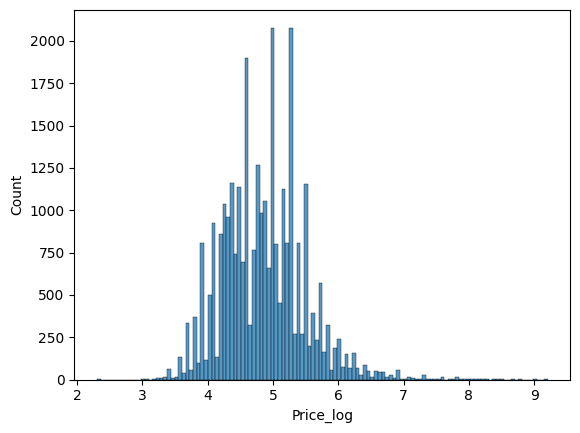

In [ ]:
df['Price_log'] = np.log(df['Price']) # Look at price on a log scale
sns.histplot(data=df,x='Price_log') # Histogram

<Axes: xlabel='Price_log', ylabel='Density'>

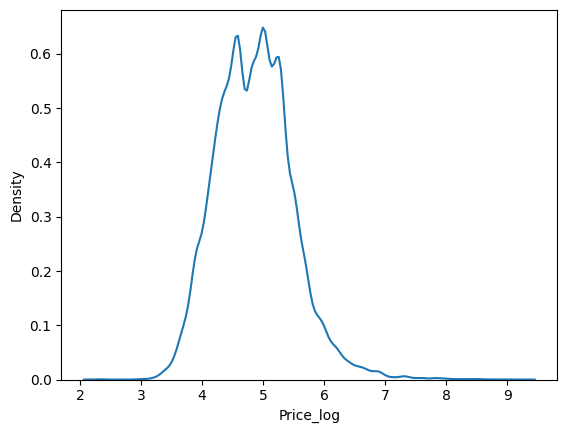

In [ ]:
sns.kdeplot(data=df,x='Price_log') # Kernel plot

<Axes: xlabel='Price_log'>

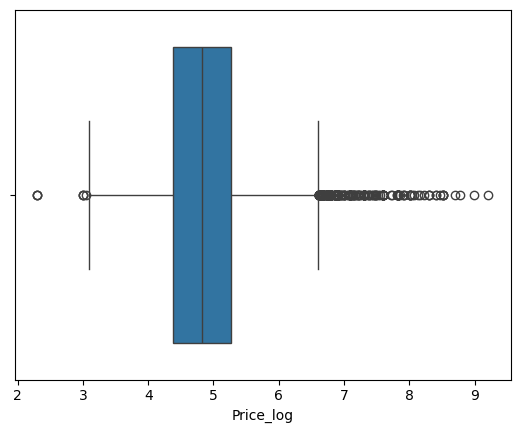

In [ ]:
sns.boxplot(data=df,x='Price_log') # Box plot

The log scale made the data much more properly scaled and readable.

5. Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

<Axes: xlabel='Beds', ylabel='Price_log'>

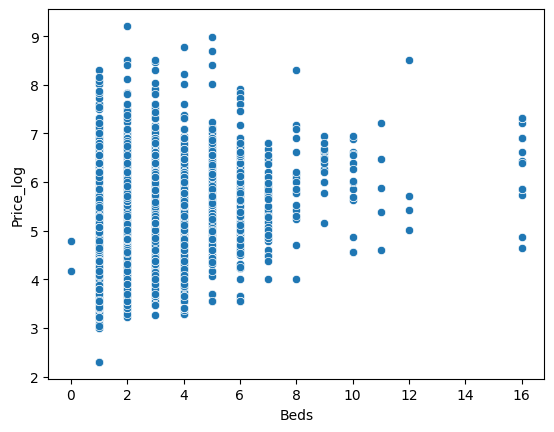

In [ ]:
sns.scatterplot(data=df, x='Beds', y='Price_log') # Scatterplot

In [ ]:
df.loc[:,['Beds','Price']].groupby('Beds').describe() # Locates the variables Beds and Price and groups the arrays by Beds, then outputs a stat description

Price                                                           \
        count         mean          std    min     25%    50%      75%   
Beds                                                                     
0.0       2.0    92.000000    38.183766   65.0   78.50   92.0   105.50   
1.0   20344.0   127.673810   107.047827   10.0   75.00  100.0   155.00   
2.0    6610.0   199.061271   225.706318   25.0  115.00  160.0   225.00   
3.0    2071.0   268.118300   303.106942   26.0  140.00  200.0   300.00   
4.0     783.0   315.332056   353.184402   27.0  150.00  247.0   375.00   
5.0     284.0   411.500000   672.610659   35.0  189.75  290.0   450.00   
6.0     177.0   401.768362   417.018431   35.0  199.00  275.0   425.00   
7.0      45.0   341.377778   220.116631   55.0  177.00  300.0   445.00   
8.0      24.0   589.041667   793.054934   55.0  243.75  350.0   481.25   
9.0      15.0   618.000000   233.649616  175.0  447.50  650.0   762.50   
10.0     16.0   480.187500   296.820534   95.0  291.00  407.5   706.25   
11.0      5.0   535.800000   499.217588  100.0  220.00  359.0   650.00   
12.0      4.0  1418.750000  2388.285211  150.0  206.25  262.5  1475.00   
16.0     13.0   736.000000   496.804287  104.0  350.00  625.0  1000.00   

               
          max  
Beds           
0.0     119.0  
1.0    4000.0  
2.0   10000.0  
3.0    5000.0  
4.0    6500.0  
5.0    8000.0  
6.0    2750.0  
7.0     900.0  
8.0    4000.0  
9.0    1050.0  
10.0   1050.0  
11.0   1350.0  
12.0   5000.0  
16.0   1500.0

After zero beds (which I guess is just like a setup you have to bring your own camping gear?), the majority of Airbnbs have a single bed and the numbers drop off rapidly after. It's also interesting that the prices get much more dispersed as the number of beds increases, at leas up to 5 beds. It's also clear that the price increases as the number of beds increases, but this pattern become less clear in the higher numbers of beds. This could be because of less data and more extreme outlier values.

6. Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

<Axes: xlabel='Beds', ylabel='Price_log'>

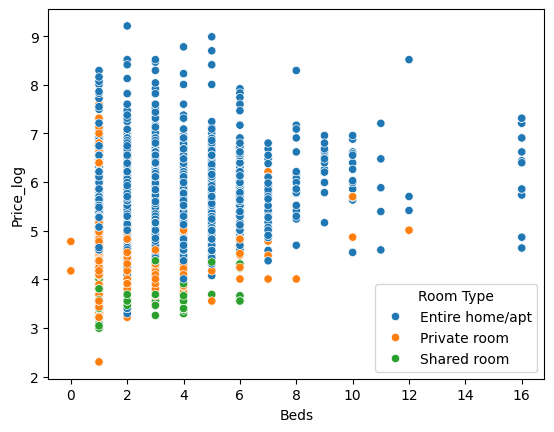

In [ ]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Room Type') # Scatterplot colored by Room type

<Axes: xlabel='Beds', ylabel='Price_log'>

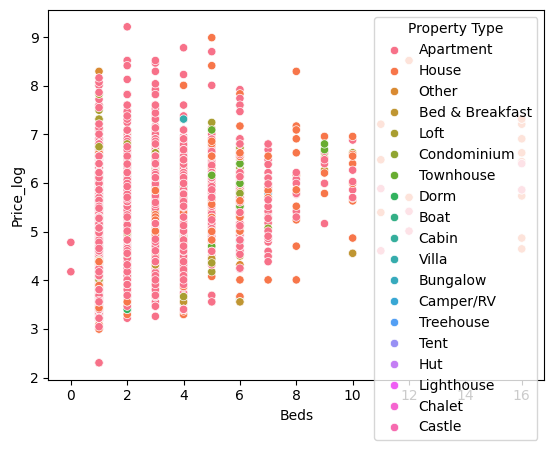

In [ ]:
sns.scatterplot(data=df,x='Beds',y='Price_log',hue='Property Type')

The one colored by room type shows that individual rooms (private or shared) are generally much cheaper than entire unit rentals. It is interesting to see that there are several higher priced room-only options within the single bedroom set. When Property Type is used to color the scatterplot, the graph is less helpful/insightful. The differences between the colors are subtle due to the large number of property types, and apartment mostly dominates the graph. You can see, however, that the concentration of novelty type properties increases at higher values for number of rooms.

In [ ]:
df.loc[:,['Room Type','Price']].groupby('Room Type').describe() # Groups by room type to return stat summary of rentals

Price                                                     \
                   count        mean         std   min    25%    50%    75%   
Room Type                                                                     
Entire home/apt  17024.0  220.796346  242.222346  10.0  135.0  175.0  240.0   
Private room     12609.0   91.919740   67.119678  10.0   65.0   80.0  100.0   
Shared room        845.0   80.514793  110.756196  10.0   45.0   60.0   85.0   

                          
                     max  
Room Type                 
Entire home/apt  10000.0  
Private room      3000.0  
Shared room       2500.0

Standard deviation is the highest by far among full home/apt rentals. This makes sense because the size and amenities of these rentals can likely vary much more than renting a specific room. The median is definitely a better measure of central tendency due to many high outliers.

7. We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

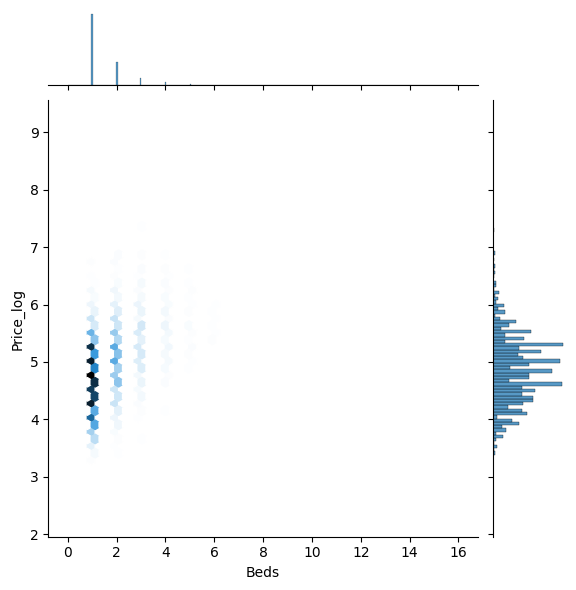

In [ ]:
sns.jointplot(data=df,x='Beds',y='Price_log',kind='hex') # Hexagonal density plot of beds and price

This shows how the plots can somewhat be misleading due to many points laid over one another not showing the actual concentration of values. But it's consistent with what we've been seeing in the stat descriptions, where the vast majority of rentals are single-bed, with it dropping off quickly as the number of beds increases. The price is somewhat more spread, given that we're looking at the log scale.

**Question 4**

1. I went with the data you had reccomended after a Covid dataset was giving me problems: "Error tokenizing data"

In [9]:
df = pd.read_csv('./visualization/data/puf2021_2_winter.csv',low_memory=False)
print(df.shape)

(10628, 195)


2. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.

The codebook specifically reports values for why the data is missing, such as Don't know, Refused, Inapplicable/Missing. In addition, the data user guide has the following language: "Item non-response rates are generally low in the MCBS data, but the researcher still needs to be aware of the missing data and be cautious about patterns of non-response." This strikes me as a thorough and well documented approach.

3. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.

KNW_COMPDESK: Own/use a desktop/laptop computer

KNW_KNOWMC: How easy is Mcare to understand

In [10]:
var = 'KNW_COMPDESK'
df[var] = df[var].replace(['D','R'], np.nan) # Removed the missing values, there were only 3
print(df[var].value_counts())

1    6737
2    3888
Name: KNW_COMPDESK, dtype: int64


In [15]:
mcare = df['KNW_KNOWMC']
mcare.unique()

array(['2', '3', '4', '1', 'D', 'R'], dtype=object)

In [17]:
mcare = pd.to_numeric(mcare, errors='coerce')
mcare.unique()
df['KNW_KNOWMC'] = mcare
del mcare

4. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?

In [14]:
df['KNW_KNOWMC']

0        2
1        2
2        3
3        4
4        4
        ..
10623    2
10624    2
10625    4
10626    3
10627    D
Name: KNW_KNOWMC, Length: 10628, dtype: object

<Axes: xlabel='KNW_KNOWMC'>

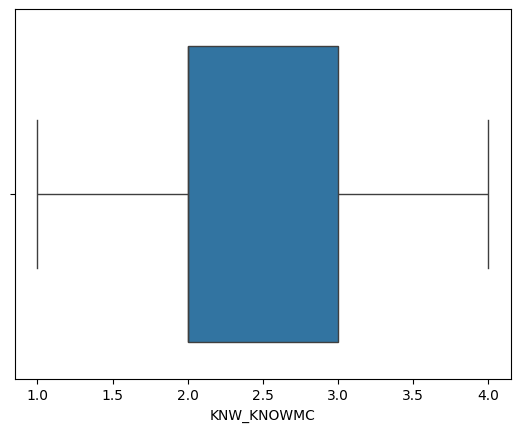

In [18]:
sns.boxplot(data=df,x='KNW_KNOWMC') # Box plot

No outliers, wouldn't make sense in the context of it being responses on a scale for a survey

<Axes: xlabel='KNW_COMPDESK', ylabel='Count'>

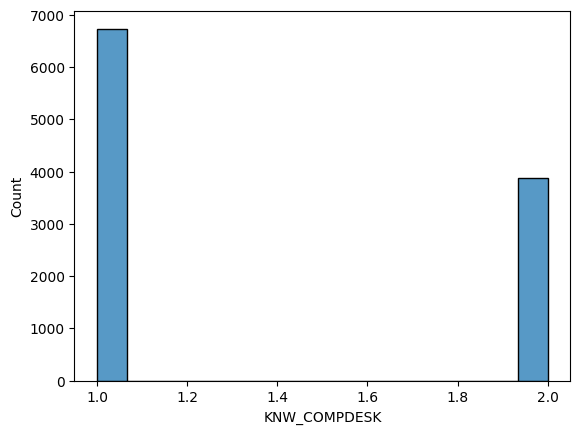

In [26]:
sns.histplot(df['KNW_COMPDESK']) # Boxplot

Shows the distribution between those who do and don't own a laptop or desktop, honestly pretty surprised by the proportion that don't in 2021 even given it is medicare

5. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?

<Axes: xlabel='KNW_KNOWMC', ylabel='Density'>

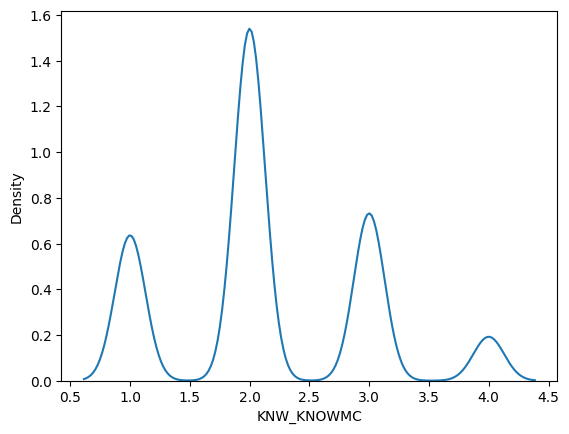

In [27]:
sns.kdeplot(data=df,x='KNW_KNOWMC') # Kernel plot

This doesn't need a transformation to rescale, but it would be a more helpful/better looking graph if we could elimate the half-steps on the x axis. 1 and 2 correspond to medicare being somewhat or very easy to understand, so it's good to see that the majority of people have a good command over it and only a small percentage responded 4, very difficult to understand.

6. Create a scatter plot, and describe the relationship you see.

This data does not lend to a scatterplot. Essentially, we are looking at the numeric representations of two categorical variables. A cross tabulation would be much more helpful.


<Axes: xlabel='KNW_KNOWMC', ylabel='KNW_COMPDESK'>

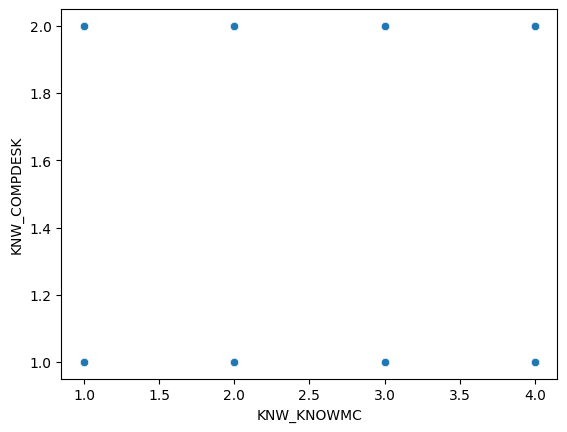

In [28]:
sns.scatterplot(data=df,x='KNW_KNOWMC',y='KNW_COMPDESK') # Scatterplot

7. Create a table (cross tabulation, variance-covariance, or a .describe() five-number summary), and explain what you see.

In [31]:
pd.crosstab(df['KNW_KNOWMC'],df['KNW_COMPDESK'])

KNW_COMPDESK,1.0,2.0
KNW_KNOWMC,,
1.0,1382,725
2.0,3304,1793
3.0,1514,911
4.0,321,316


In [33]:
df.loc[:,['KNW_KNOWMC','KNW_COMPDESK']].groupby('KNW_KNOWMC').describe()

KNW_COMPDESK                                             
                  count      mean       std  min  25%  50%  75%  max
KNW_KNOWMC                                                          
1.0              2107.0  1.344091  0.475184  1.0  1.0  1.0  2.0  2.0
2.0              5097.0  1.351776  0.477571  1.0  1.0  1.0  2.0  2.0
3.0              2425.0  1.375670  0.484395  1.0  1.0  1.0  2.0  2.0
4.0               637.0  1.496075  0.500378  1.0  1.0  1.0  2.0  2.0

This confirms my intuition about the relationship between these two variables. Those who do not have access to a computer at home rate the ease-of-understanding medicare systematically lower. The statistical description shows that for those that rate medicare as difficult to understand, they are much more likely to not have access to a computer at home. Given that Medicare caters to a lot of people without this computer access, they should work to ensure it is reasonably easy to understand without.